# Logistic Regression Breast Cancer

In [18]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Importing our data and ropping the rows that we know from our pervious two machine learning algorthims are not important  

In [19]:
cancer = pd.read_csv('data.csv')

In [20]:
cancer.drop(['Unnamed: 32','id'],axis=1, inplace=True)

In [21]:
x = cancer.drop(['diagnosis'],axis =1)
y = cancer ['diagnosis']

Converting M and B to 0 and 1 

In [22]:
y=cancer['diagnosis'].map({'M':0,'B':1}).astype(int)
y.tail()

564    0
565    0
566    0
567    0
568    1
Name: diagnosis, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
s_scaled=StandardScaler()
x_train = s_scaled.fit_transform(x_train)
x_test = s_scaled.transform(x_test)

In [27]:
classif = LogisticRegression().fit(x_train,y_train)
y_pred = classif.predict(x_test)

In [29]:
confusion_matrix(y_test,y_pred)

array([[41,  2],
       [ 1, 70]])

We can observe from the matrix:

False Negatives: 1, False Positives: 2, True Positives: 41, True Negatives: 70

In [30]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

In [31]:
print(classification_report(y_test, y_pred,target_names=['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.98      0.95      0.96        43
      Benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [41]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
y_test_pred_prob=classif.predict_proba(x_test)[:,1]
metrics.roc_auc_score(y_test, y_test_pred_prob)

0.99737962659679

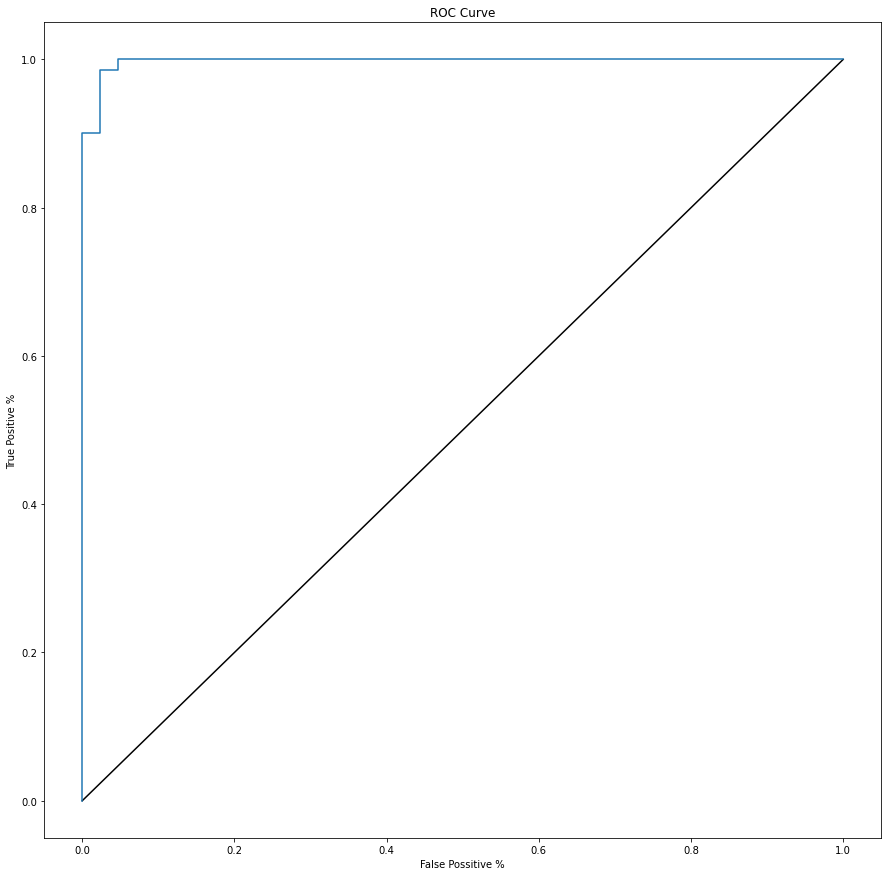

In [49]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.plot([0,1],[0,1],'k')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("False Possitive %")
plt.ylabel("True Positive %")
plt.title("ROC Curve")
plt.show()

Our model performed exceptionally well, with an AOC of 99.7%, near to flawless diagnostic capabilities for our classifier, as seen in the above data.